<a href="https://colab.research.google.com/github/Poojitha-0407/FMML-2025/blob/main/Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

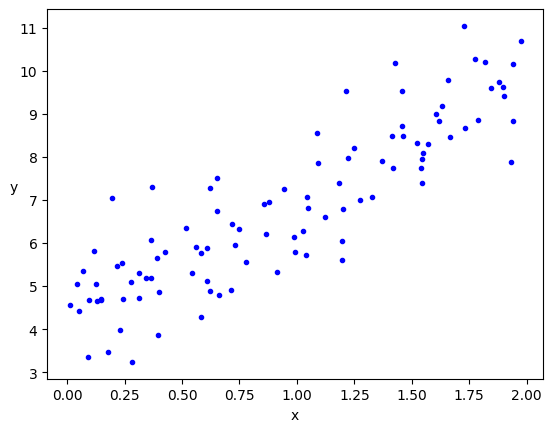

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [7]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

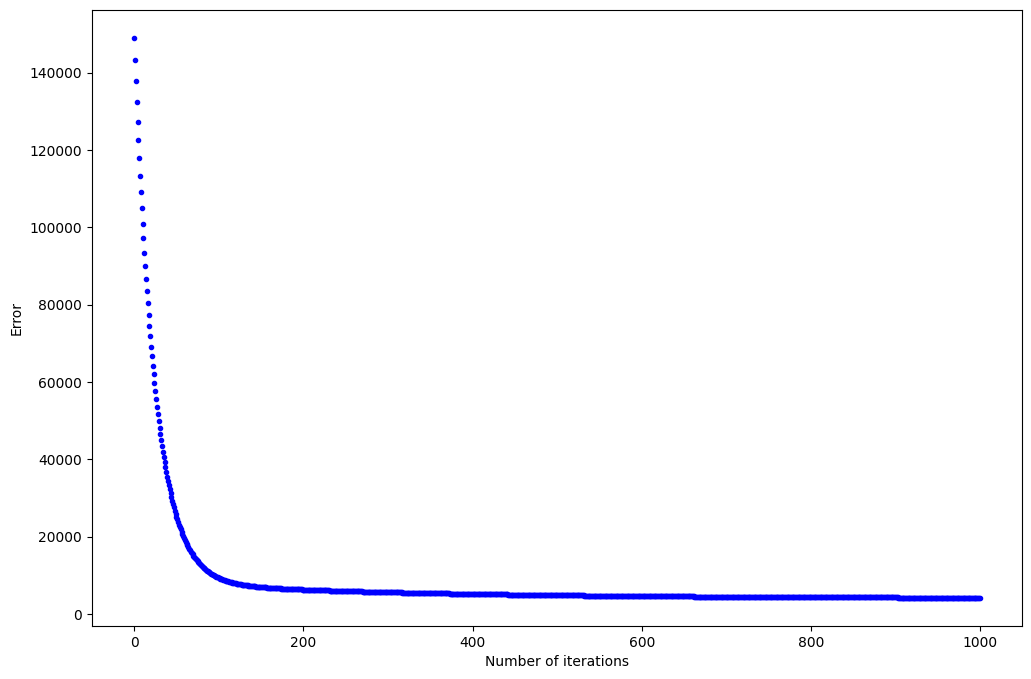

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

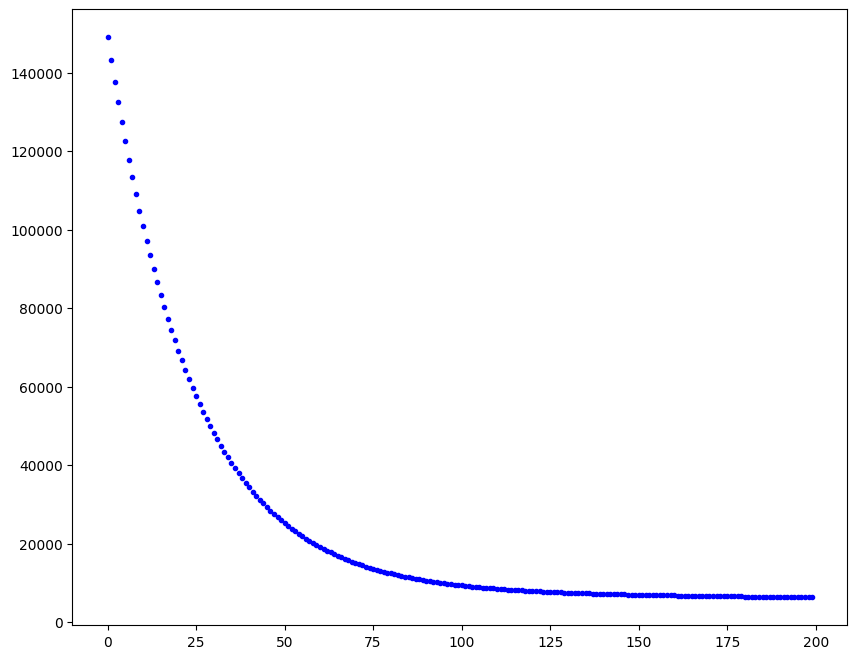

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [10]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [11]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


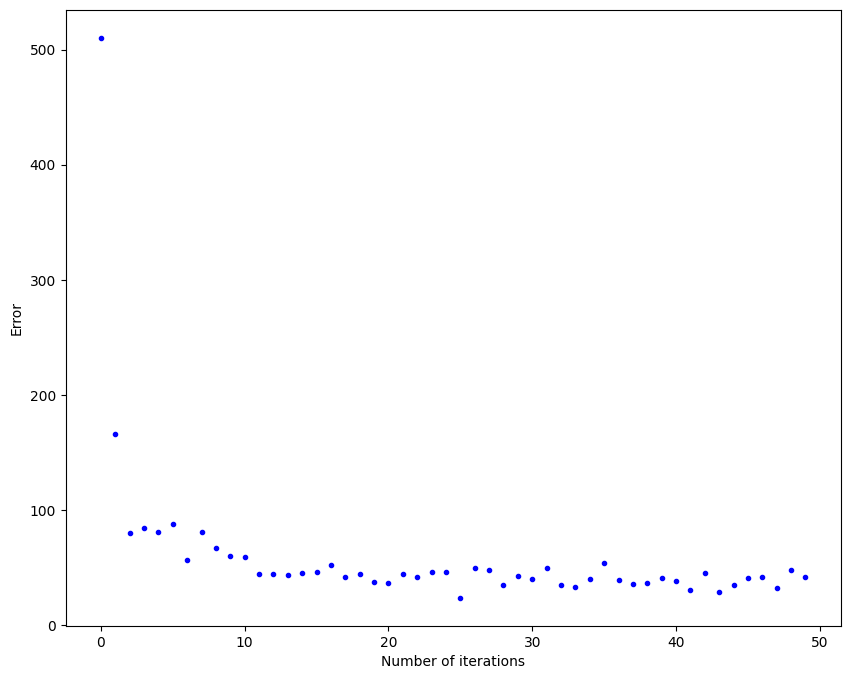

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [13]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [14]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


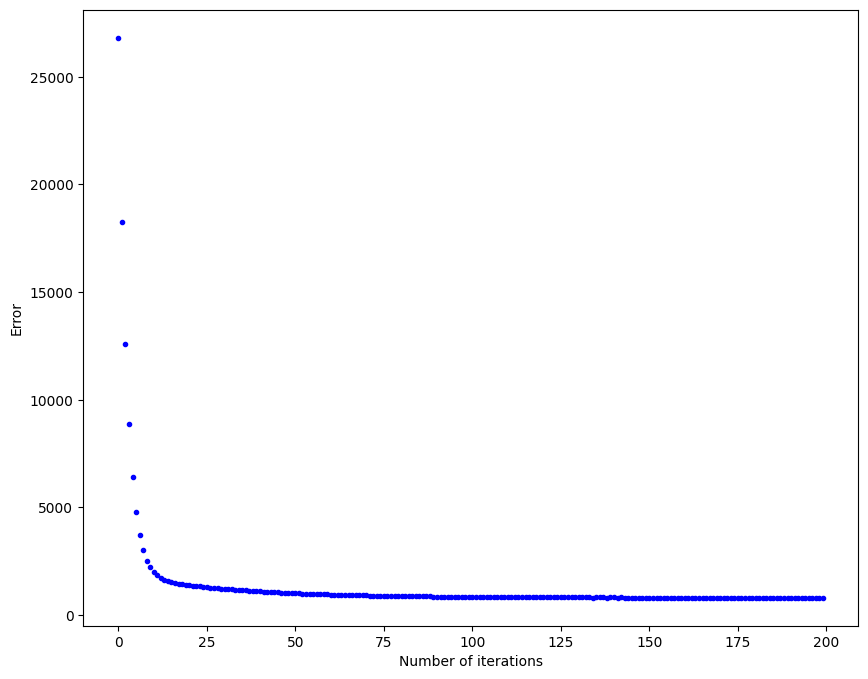

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

**Things to try out:**

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

In [16]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=3):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history


In [17]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.248
y_pred[1]: 2.741
Final error: 120.712


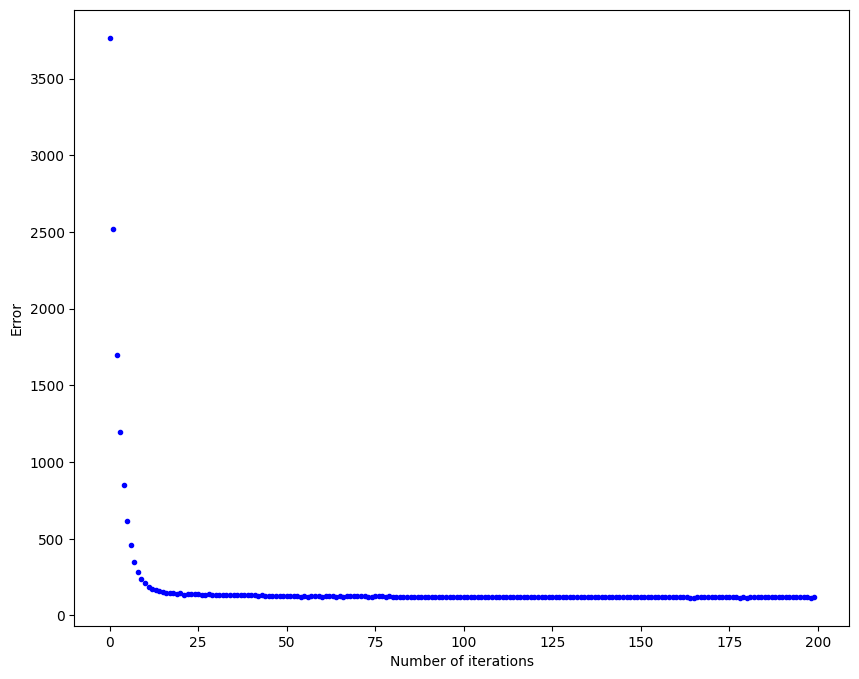

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [20]:
db = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [21]:
import pandas as pd
df = pd.read_csv('USA_Housing.csv')

In [22]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, 1))

In [24]:
def linear_regression(X, theta):
    return X.dot(theta)

# Initializations
theta_batch = np.random.randn(2, 1)
theta_stochastic = np.random.randn(2, 1)
theta_minibatch = np.random.randn(2, 1)

lr_batch = 0.01
lr_stochastic = 0.1
lr_minibatch = 0.05

n_iter = 1000
batch_size = 20

In [25]:
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [26]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        # Initialize y_pred here with the correct shape
        y_pred = np.random.randn(X.shape[1], 1)

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

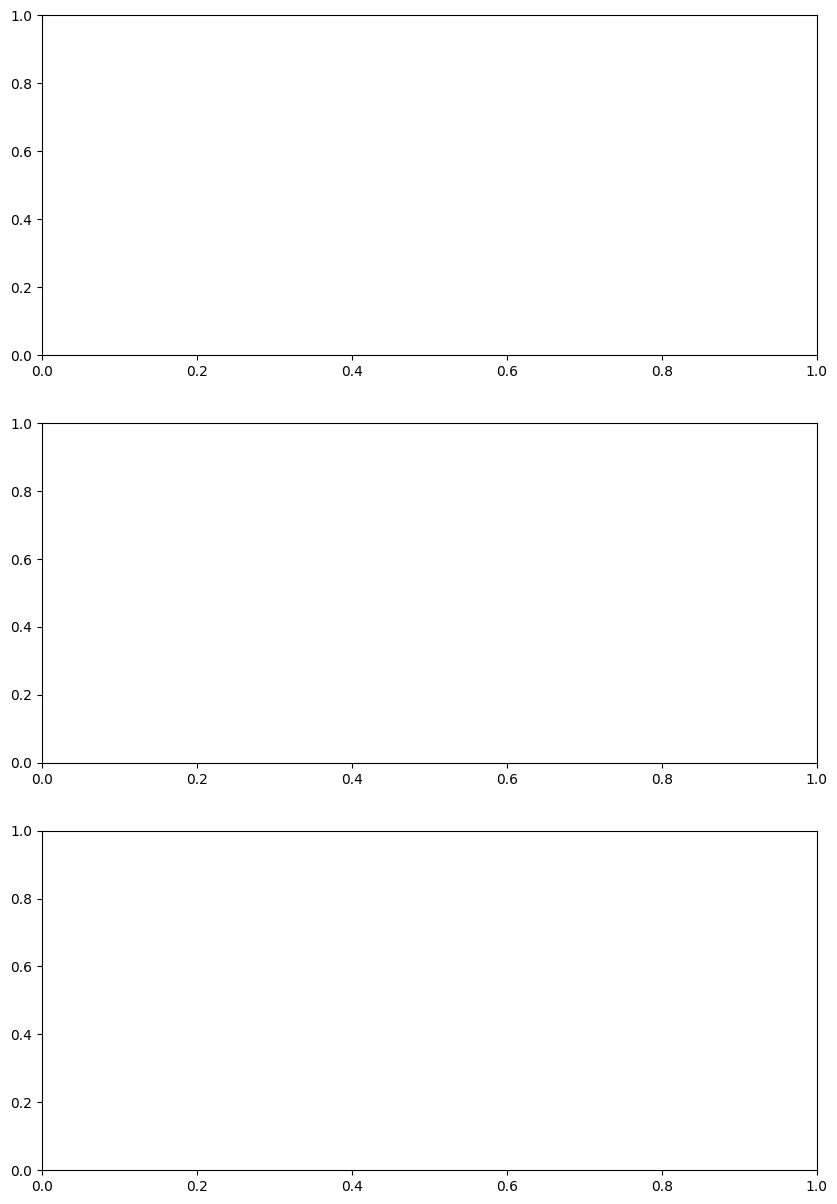

In [27]:
# Batch Gradient Descent
X_batch = np.c_[np.ones((len(X), 1)), X]
theta_batch, cost_history_batch, _ = gradient_descent(X_batch, y, theta_batch, lr_batch, n_iter)

# Stochastic Gradient Descent
X_stochastic = np.c_[np.ones((len(X), 1)), X]
theta_stochastic, cost_history_stochastic = stocashtic_gradient_descent(X_stochastic, y, theta_stochastic, lr_stochastic, n_iter)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

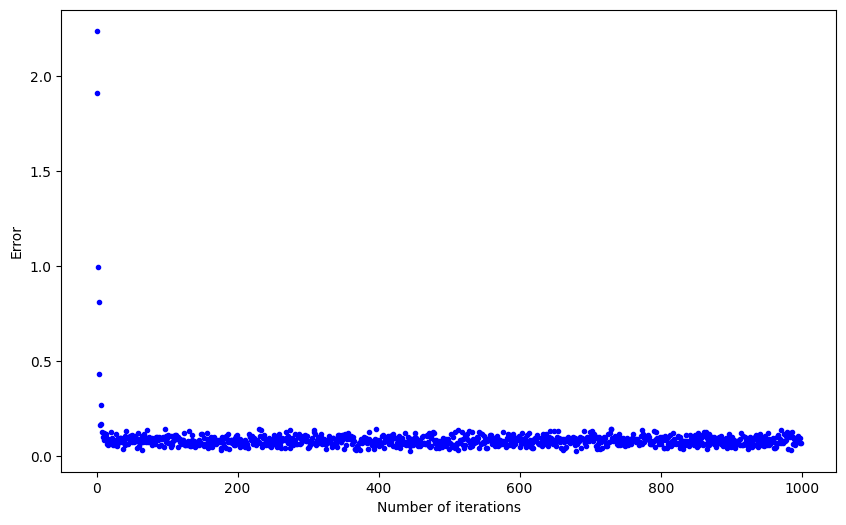

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def minibatch_gradient_descent(X, y, theta, learning_rate, n_iterations, batch_size):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for iteration in range(n_iterations):
        # Shuffle the data and split into mini-batches
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute predictions
            y_pred = np.dot(X_batch, theta)

            # Compute gradient
            gradient = (1/batch_size) * np.dot(X_batch.T, (y_pred - y_batch))

            # Update parameters
            theta -= learning_rate * gradient

        # Compute cost
        cost_history[iteration] = (1/(2*m)) * np.sum((y_pred - y_batch)**2)

    return theta, cost_history

# Assuming lr_minibatch, n_iter, and batch_size are defined
# Also, assuming X, y, and theta_minibatch are correctly defined

# Create X_minibatch with added bias term
X_minibatch = np.c_[np.ones((len(X), 1)), X]

# Reshape y to have shape (batch_size, 1)
y_minibatch = y.reshape((-1, 1))

# Initialize y_pred_minibatch here with the correct shape
y_pred_minibatch = np.dot(X_minibatch, theta_minibatch)

theta_minibatch, cost_history_minibatch = minibatch_gradient_descent(X_minibatch, y_minibatch, theta_minibatch, lr_minibatch, n_iter, batch_size)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history_minibatch, 'b.')
plt.show()

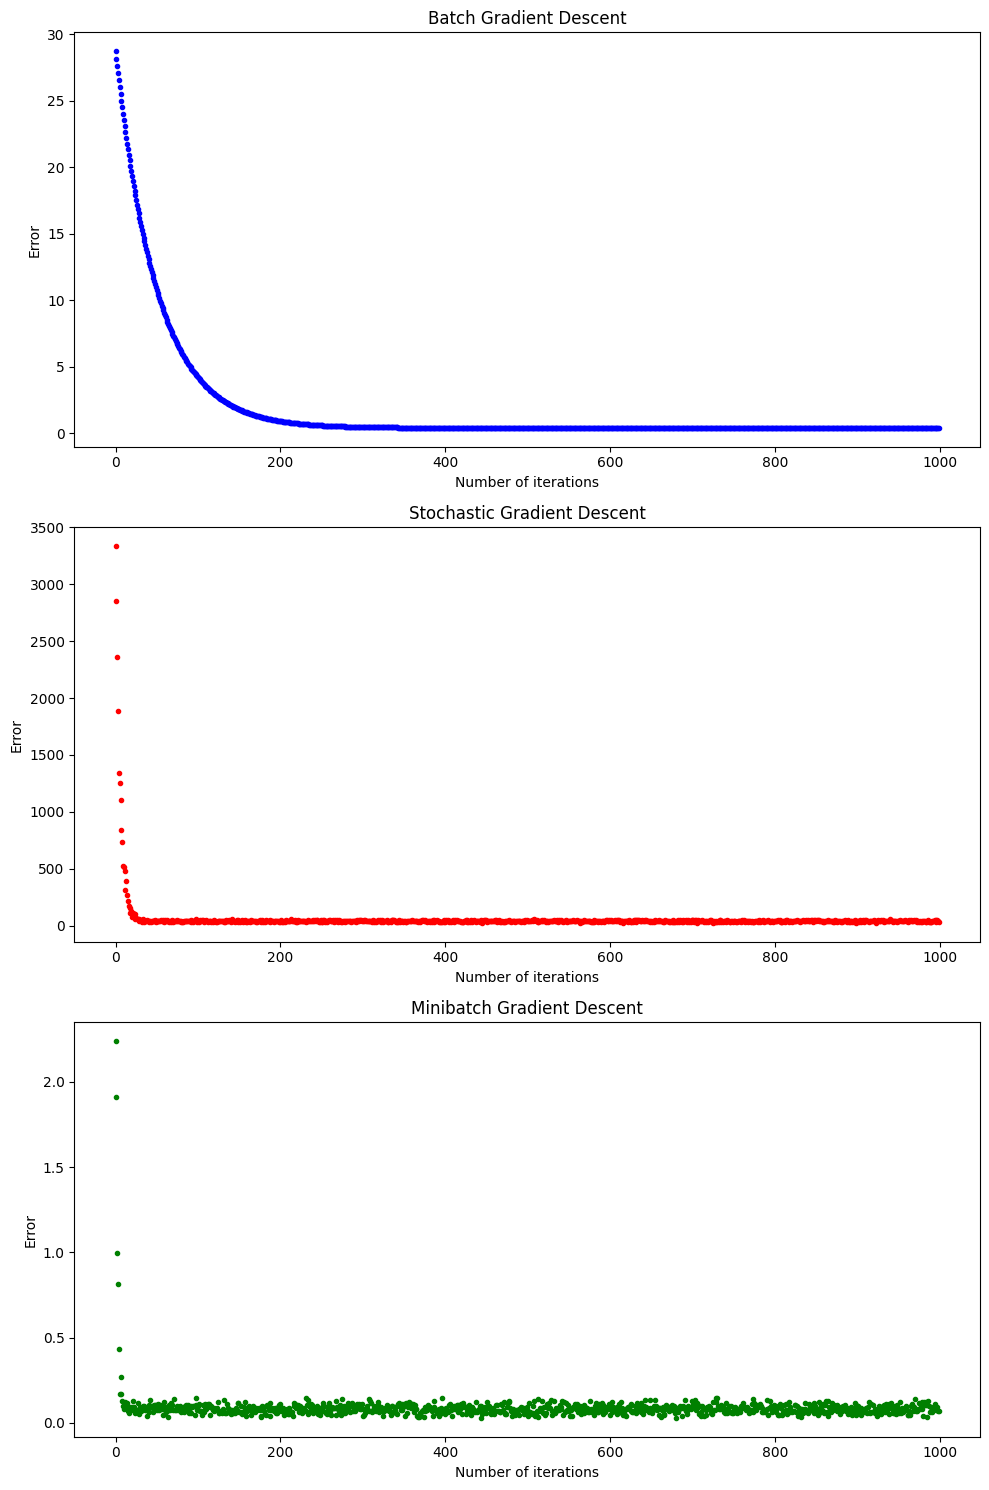

In [30]:
# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Batch Gradient Descent
axs[0].plot(range(n_iter), cost_history_batch, 'b.')
axs[0].set_title('Batch Gradient Descent')
axs[0].set_ylabel('Error')
axs[0].set_xlabel('Number of iterations')

# Stochastic Gradient Descent
axs[1].plot(range(n_iter), cost_history_stochastic, 'r.')
axs[1].set_title('Stochastic Gradient Descent')
axs[1].set_ylabel('Error')
axs[1].set_xlabel('Number of iterations')

# Minibatch Gradient Descent
axs[2].plot(range(n_iter), cost_history_minibatch, 'g.')
axs[2].set_title('Minibatch Gradient Descent')
axs[2].set_ylabel('Error')
axs[2].set_xlabel('Number of iterations')

plt.tight_layout()
plt.show()

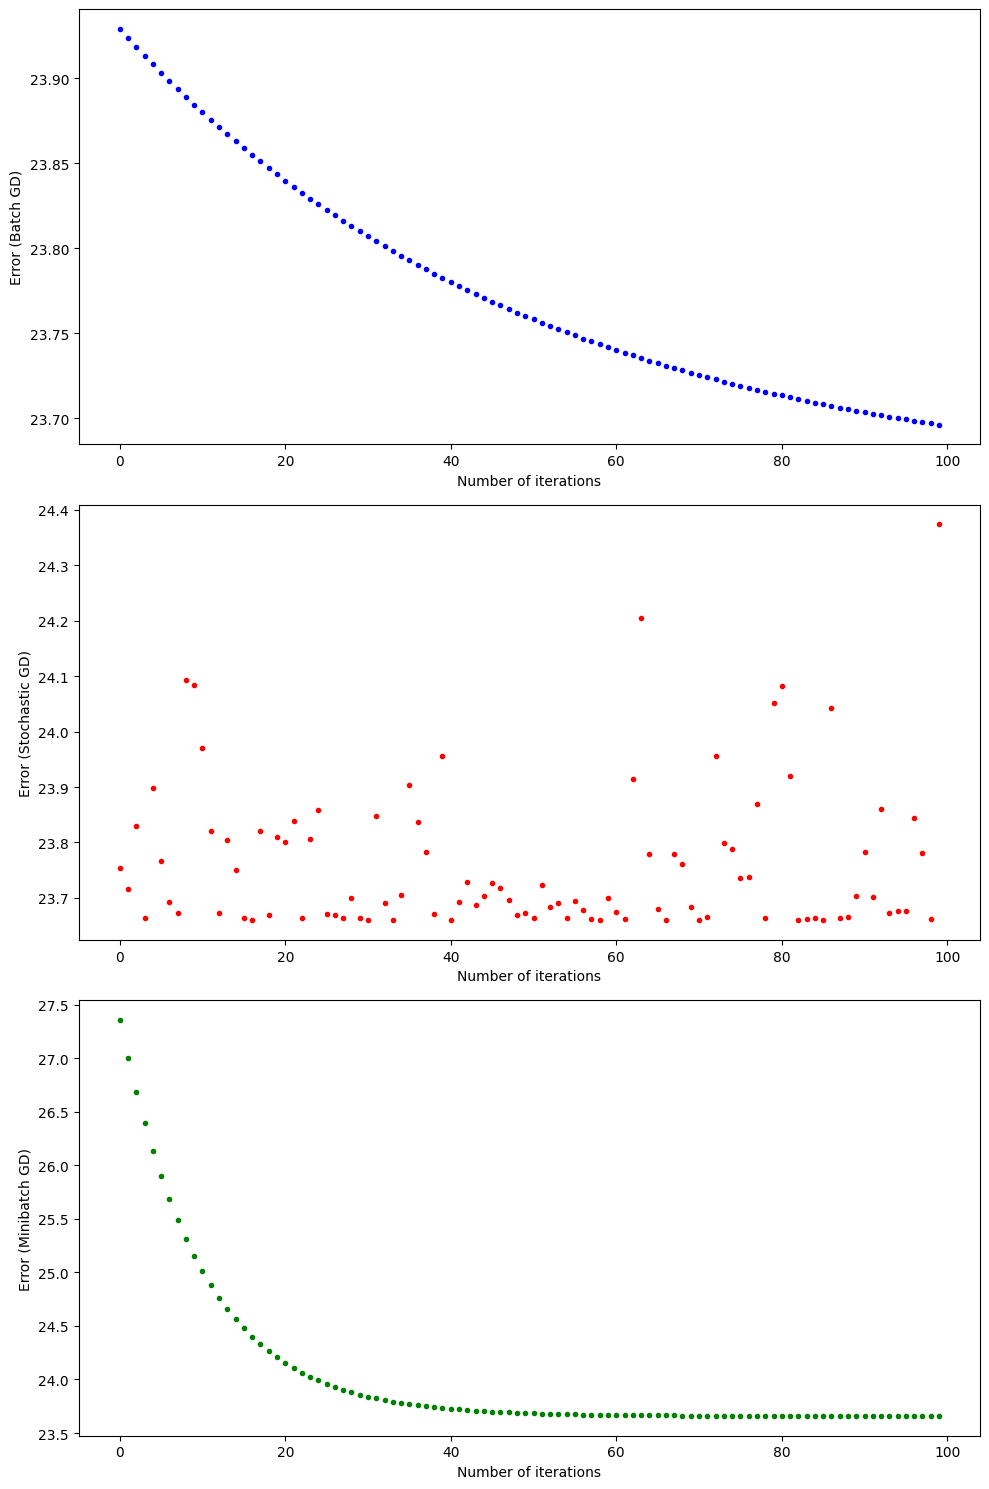

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have defined your data (X, y) and initial parameters (theta) here

# Set common parameters
n_iter = 100
batch_size = 20

# Define different learning rates
lr_batch = 0.01
lr_stochastic = 0.01
lr_minibatch = 0.01

# Assuming you have defined the following functions elsewhere
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for iteration in range(n_iterations):
        # Compute predictions
        y_pred = np.dot(X, theta)

        # Compute gradient
        gradient = (1/m) * np.dot(X.T, (y_pred - y))

        # Update parameters
        theta -= learning_rate * gradient

        # Compute cost
        cost_history[iteration] = (1/(2*m)) * np.sum((y_pred - y)**2)

    return theta, cost_history

def stochastic_gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for iteration in range(n_iterations):
        for i in range(m):
            # Randomly select a data point
            random_index = np.random.randint(0, m)
            X_i = X[random_index].reshape(1, -1)
            y_i = y[random_index].reshape(1, -1)

            # Compute prediction for the selected point
            y_pred = np.dot(X_i, theta)

            # Compute gradient for the selected point
            gradient = np.dot(X_i.T, (y_pred - y_i))

            # Update parameters
            theta -= learning_rate * gradient

        # Compute cost
        cost_history[iteration] = (1/(2*m)) * np.sum((np.dot(X, theta) - y)**2)

    return theta, cost_history

def minibatch_gradient_descent(X, y, theta, learning_rate, n_iterations, batch_size):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute predictions
            y_pred = np.dot(X_batch, theta)

            # Compute gradient
            gradient = (1/batch_size) * np.dot(X_batch.T, (y_pred - y_batch))

            # Update parameters
            theta -= learning_rate * gradient

        # Compute cost
        cost_history[iteration] = (1/(2*m)) * np.sum((np.dot(X, theta) - y)**2)

    return theta, cost_history

# Batch Gradient Descent
theta_batch = np.random.randn(X.shape[1], 1)
theta_batch, cost_history_batch = gradient_descent(X, y, theta_batch, lr_batch, n_iter)

# Stochastic Gradient Descent
theta_stochastic = np.random.randn(X.shape[1], 1)
theta_stochastic, cost_history_stochastic = stochastic_gradient_descent(X, y, theta_stochastic, lr_stochastic, n_iter)

# Minibatch Gradient Descent
theta_minibatch = np.random.randn(X.shape[1], 1)
theta_minibatch, cost_history_minibatch = minibatch_gradient_descent(X, y, theta_minibatch, lr_minibatch, n_iter, batch_size)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Batch GD Plot
axs[0].set_ylabel('Error (Batch GD)')
axs[0].set_xlabel('Number of iterations')
axs[0].plot(range(n_iter), cost_history_batch, 'b.')

# Stochastic GD Plot
axs[1].set_ylabel('Error (Stochastic GD)')
axs[1].set_xlabel('Number of iterations')
axs[1].plot(range(n_iter), cost_history_stochastic, 'r.')

# Minibatch GD Plot
axs[2].set_ylabel('Error (Minibatch GD)')
axs[2].set_xlabel('Number of iterations')
axs[2].plot(range(n_iter), cost_history_minibatch, 'g.')

plt.tight_layout()
plt.show()
